#**Understanding PyTorch library and its working for Machine Learning especially for Deep Learning**

From official page :

It is an *end-to-end machine learning framework*.

PyTorch enables fast, flexible experimentation and efficient production through a user-friendly front-end, distributed training, and ecosystem of tools and libraries.


-----------------------------

Here, we will be going through the basic concepts of PyTorch library along with examples of build machine learning components.

If you already know the concepts related with Numpy or TensorFlow libraries, It will be very easy to understand PyTorch concepts.

For Installing PyTorch, please refer here : https://pytorch.org/get-started/locally/



In [1]:
# importing the PyTorch library
import torch

In [2]:
# Tensors are arrays that are the building blocks of Neural Networks and othe ML Algo.
# Create tensors: Create two 1D/2D tensors A and B of the same size, for example:
A = torch.tensor([1, 2, 3])
B = torch.tensor([[9, 8, 7], [6, 5, 4], [3, 2, 1]], dtype=torch.float32)
print(A)
print(B)
print(A.shape)
print(B.shape)
print(A.ndim)  # dimension of tensor A
print(B.ndim)  # dimension of tensor B
print(A.type)
print(B.dtype)  # data type os tensor B

A = A.type(torch.FloatTensor)  # changing datatype
print(A)

tensor([1, 2, 3])
tensor([[9., 8., 7.],
        [6., 5., 4.],
        [3., 2., 1.]])
torch.Size([3])
torch.Size([3, 3])
1
2
<built-in method type of Tensor object at 0x7ed577ee0e00>
torch.float32
tensor([1., 2., 3.])


In [3]:
# Initializing the tensors
# The simplest way to create a tensor is with the torch.empty() call:

x = torch.empty(3, 4)  # Not initialized with any value (has random numbers)
print(type(x))
print(x)
# The torch.empty() call allocates memory for the tensor, but does not initialize it with any values

<class 'torch.Tensor'>
tensor([[1.7261e+13, 4.5500e-41, 1.7261e+13, 4.5500e-41],
        [2.1019e-44, 0.0000e+00, 9.1084e-44, 0.0000e+00],
        [3.9518e-32, 3.2132e-41, 3.9517e-32, 3.2132e-41]])


In [4]:
# We can define and initialize the tensors as below:
zeros = torch.zeros(2, 3)
print(zeros)
# tensor with similar shapes using :  like
zeros_likes = torch.zeros_like(zeros)
print(zeros_likes)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


In [5]:
# Tensor Broadcasting : Brief Introduction
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.2332, 0.4047, 0.2162, 0.9927],
        [0.4128, 0.5938, 0.6128, 0.1519]])
tensor([[0.4664, 0.8093, 0.4325, 1.9854],
        [0.8255, 1.1876, 1.2255, 0.3039]])


In [6]:
# Rules for Broadcasting:
"""
1. Each tensor must have at least one dimension - no empty tensors.

2. Comparing the dimension sizes of the two tensors, going from last to first:

    -> Each dimension must be equal, or
    -> One of the dimensions must be of size 1, or
    -> The dimension does not exist in one of the tensors

Example: This is an important operation in Deep Learning. The common example is multiplying
a tensor of learning weights by a batch of input tensors, applying the operation to
each instance in the batch separately, and returning a tensor of identical shape.
"""

a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[0.0453, 0.5035],
         [0.9978, 0.3884],
         [0.6929, 0.1703]],

        [[0.0453, 0.5035],
         [0.9978, 0.3884],
         [0.6929, 0.1703]],

        [[0.0453, 0.5035],
         [0.9978, 0.3884],
         [0.6929, 0.1703]],

        [[0.0453, 0.5035],
         [0.9978, 0.3884],
         [0.6929, 0.1703]]])
tensor([[[0.1384, 0.1384],
         [0.4759, 0.4759],
         [0.7481, 0.7481]],

        [[0.1384, 0.1384],
         [0.4759, 0.4759],
         [0.7481, 0.7481]],

        [[0.1384, 0.1384],
         [0.4759, 0.4759],
         [0.7481, 0.7481]],

        [[0.1384, 0.1384],
         [0.4759, 0.4759],
         [0.7481, 0.7481]]])
tensor([[[0.0361, 0.5062],
         [0.0361, 0.5062],
         [0.0361, 0.5062]],

        [[0.0361, 0.5062],
         [0.0361, 0.5062],
         [0.0361, 0.5062]],

        [[0.0361, 0.5062],
         [0.0361, 0.5062],
         [0.0361, 0.5062]],

        [[0.0361, 0.5062],
         [0.0361, 0.5062],
         [0.0361, 0.5062]]])


In [8]:
# Wrong scenarios of Broadcasting:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(4, 3)    # dimensions must match last-to-first

c = a * torch.rand(   2, 3) # both 3rd & 2nd dims different

d = a * torch.rand((0, ))   # can't broadcast with an empty tensor

RuntimeError: ignored

In [9]:
# Copying tensors
# 1. Copying directly means assignment of source tensor to target tensors:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered
print("\n")


# 2. Cloning to copying contents or details of source to target tensor:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)
print("\n")

# Note: If your source tensor has autograd, enabled then so will the clone.

# We can resolve it by detaching the tenosr before cloning it to target
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()  # The detach() method detaches the tensor from its computation history.
print(c)

print(a)

tensor([[  1., 561.],
        [  1.,   1.]])


tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


tensor([[0.5731, 0.7191],
        [0.4067, 0.7301]], requires_grad=True)
tensor([[0.5731, 0.7191],
        [0.4067, 0.7301]], grad_fn=<CloneBackward0>)
tensor([[0.5731, 0.7191],
        [0.4067, 0.7301]])
tensor([[0.5731, 0.7191],
        [0.4067, 0.7301]], requires_grad=True)


In [10]:
# Interoperability with other Python libraries like below.
import numpy

array = numpy.array([1,2,5])
print(array)
C = torch.from_numpy(array)
print(C)
tensor_to_array = C.numpy()
print(tensor_to_array)

[1 2 5]
tensor([1, 2, 5])
[1 2 5]


In [11]:
# Let's explore Basic linear algebra subprogram (BLAS) on these tensors.

# 1. Matrix addition: Add the two tensors A and C (with same dimension)
AC_sum = torch.add(A, C)
print(f'AC_sum: {AC_sum}')

#  Matrix subtraction: Subtract tensor C from tensor A.
AC_sub = torch.sub(A, C)
print(f'AC_sub: {AC_sub}')


# Matrix multiplication: Multiply tensor A(1x3) and tensor B(3x3).
AB_matmul = torch.matmul( A, B)  # gives output (1x3)
AB_mm = torch.mm(A.view(1,3), B)  # needs to converted to matrix shape first
print(f'AB_matmul: {AB_matmul}')
print(f'AB_mm: {AB_mm}')

# Element-wise multiplication: Perform element-wise multiplication between tensor A and tensor C.
AC_mul = torch.mul(A, C)
print(f'AC_sub: {AC_mul}')


print(torch.randint(5,(2,2)))

AC_sum: tensor([2., 4., 8.])
AC_sub: tensor([ 0.,  0., -2.])
AB_matmul: tensor([30., 24., 18.])
AB_mm: tensor([[30., 24., 18.]])
AC_sub: tensor([ 1.,  4., 15.])
tensor([[4, 4],
        [0, 3]])


-----------------------------------------------------
Here are some **best practices and common errors** to avoid when implementing basic Linear Algebra Subprogram (**BLAS**) operations in PyTorch:

* **Use appropriate data types:** Ensure that you use the correct data type for your tensors, such as torch.float32 or torch.int32. Mixing data types without proper conversion can lead to unexpected results and errors.

* **Dimensionality:** Make sure that the tensors involved in the operations have compatible shapes. For instance, when performing matrix multiplication, the number of columns in the first matrix should match the number of rows in the second matrix.

* **In-place operations:** PyTorch provides in-place versions of operations (e.g., add_(), sub_(), mul_()) that directly modify the input tensor without creating a new one. Use these carefully, as they may lead to unwanted side effects if not managed properly.

* **Memory management:** Be aware of memory consumption, especially when working with large tensors. Reusing tensors or performing operations in-place can help reduce memory usage.

* **Use GPU acceleration:** PyTorch supports GPU acceleration for tensor operations. To take advantage of this feature, move your tensors to the GPU using the .to() or .cuda() methods.



```
               device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
               A = A.to(device)
               B = B.to(device)
               Note: It is important to know that in order to do computation
                 involving two or more tensors, all of the tensors must be on the same device.
                 Otherwise, the code will throw a runtime error, regardless of
                 whether you have a GPU device available
```


* **Error handling:** When implementing BLAS operations, it’s essential to handle exceptions that may arise due to incompatible tensor shapes or data types. Use the try and except statements to catch and handle errors gracefully.

In [12]:
# Implement tensor slicing and indexing
# 1. Indexing
#    Access specific elements in a tensor using indices, similar to Python lists:
element = B[0, 1]  # Access the element at row 0 and column 1
print(f'element: {element}')

# 2. Slicing
#    Slice tensors by specifying a range of indices for each dimension:
sub_tensor = B[1:3, 0:2]  # Extracts the sub-tensor from rows 1 to 2 (inclusive)
                                # and columns 0 to 1 (inclusive)
print(f'sub_tensor: {sub_tensor}')

# Advanced Indexing  (similar to filtering in Dataframe)
# Use integer tensors or boolean masks for more advanced indexing:
mask = B > 5  # Creates a boolean mask where each element is True if the
                      # corresponding element in 'tensor' is greater than 5
result = B[mask]  # Extracts elements from 'tensor' where the corresponding mask element is True
print(f'result: {result}')

element: 8.0
sub_tensor: tensor([[6., 5.],
        [3., 2.]])
result: tensor([9., 8., 7., 6.])


----------------------------------------------------------
When working with **tensor slicing and indexing** in PyTorch, consider the following best practices and common errors:

* **Remember zero-indexing:** In Python and PyTorch, indices start from 0, not 1. Ensure you are using the correct index when accessing tensor elements.

* **Understand slicing ranges:** When slicing, the start index is inclusive, while the end index is exclusive. For example, tensor[0:2] will include elements at indices 0 and 1, but not 2.

* **Preserve dimensions:** When slicing a single row or column, the resulting tensor may have reduced dimensions. To preserve dimensions, use a slice instead of a single index: tensor[1:2, :] instead of tensor[1, :].

* **Avoid in-place operations:** In-place operations, such as **tensor[0, 1] += 1**, can cause issues with PyTorch’s gradient computation. Use tensor = tensor + 1 or **tensor.add_(1)** for safer alternatives.

* **Use advanced indexing cautiously:** Advanced indexing with integer tensors or boolean masks can be powerful but may also introduce complexity and performance overhead. Use simple indexing and slicing when possible, and only resort to advanced techniques when necessary.

* **Ensure correct index data types:** When using integer tensors for advanced indexing, ensure the data type is torch.long or torch.int64. Other data types may cause unexpected behavior.

In [13]:
# Derivatives
# A tensor can be created with requires_grad=True so that torch.autograd records
# operations on them for automatic differentiation

x = torch.tensor(2.0, requires_grad = True)   # tensor with which derivative will be taken
print("x: ", x)
y = x ** 2

y.backward()  # derivative of y is calculated with respect to x  => 2*x

result = x.grad
print(f'result: {result}')

x:  tensor(2., requires_grad=True)
result: 4.0


In [14]:
"""

Behind the scenes, pytorch calculates derivatives by creating a backwards graph.
It is a particular type of graph in which the tensors and the backwards functions
are the nodes in the graph.

Based upon whether a particular tensor is a leaf or not in the graph, pytorch
evaluates the derivative of that tensor. If the leaf attribute for a tensor is set
to True, pytorch won’t evaluate its derivative.

Thus, leaf attribute of graph does not have grad function.

"""

# The power of autograd comes from the fact that it traces your computation dynamically
# at runtime, meaning that if your model has decision branches, or loops whose lengths
# are not known until runtime, the computation will still be traced correctly, and
# you’ll get correct gradients to drive learning.

print(" For x")
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("x is_leaf:",x.is_leaf) # derivative not calculated
print("requires_grad:",x.requires_grad)
print("\n")

print("For y")
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

# Note: In particular, the gradients over the learning weights are of interest to us -
# they tell us what direction to change each weight to get the loss function closer to zero.

 For x
data: tensor(2.)
grad_fn: None
grad: tensor(4.)
x is_leaf: True
requires_grad: True


For y
data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7ed648ef0bb0>
grad: None
is_leaf: False
requires_grad: True


<ipython-input-14-44dc6728f74c>:31: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print('grad:',y.grad)


In [15]:
# Partial Derivatives
# Here we have a function of two variables or more variables. We will use
# rule of derivative to calculate partial derivative

u = torch.tensor(2.0, requires_grad = True)   # tensor with which derivative will be taken
v = torch.tensor(3.0, requires_grad = True)   # tensor with which derivative will be taken

py = u**2 + 2*u*v + v**2 + u + 3*v + 1

# When you call .backward() on a tensor with no arguments, it expects the calling
# tensor to contain only a single element.
py.backward()   # partial derivative is calculated. w.r.t u => 2*u + 2*v + 1
                                           # w.r.t v  => 2*u + 2*v + 3

u_result = u.grad
v_result = v.grad

# Autograd tracks the history of every computation. Every computed tensor in your
# PyTorch model carries a history of its input tensors and the function used to create it.
print("output py: ", py)

print("u_result: ", u_result)
print("v_result: ", v_result)

# Each grad_fn stored with our tensors allows you to walk the computation all
# the way back to its inputs with its next_functions property.
print("go backward to find previous grad_function: ", py.grad_fn.next_functions)
print("go backward to find previous grad_function: ", py.grad_fn.next_functions[0][0].next_functions)

output py:  tensor(37., grad_fn=<AddBackward0>)
u_result:  tensor(11.)
v_result:  tensor(13.)
go backward to find previous grad_function:  ((<AddBackward0 object at 0x7ed648ef02b0>, 0), (None, 0))
go backward to find previous grad_function:  ((<AddBackward0 object at 0x7ed648ef3f10>, 0), (<MulBackward0 object at 0x7ed648ef32b0>, 0))


In [16]:
# Custom derivative function class by subclassing torch.autograd.Function and
# implementing the forward and backward passes

class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2   # fixed derivative function
        ctx.save_for_backward(i)  # caching objects in context
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [17]:
sq=SQ.apply

custom_fun = sq(x)
custom_fun.backward()

print(x.grad)

tensor(8.)


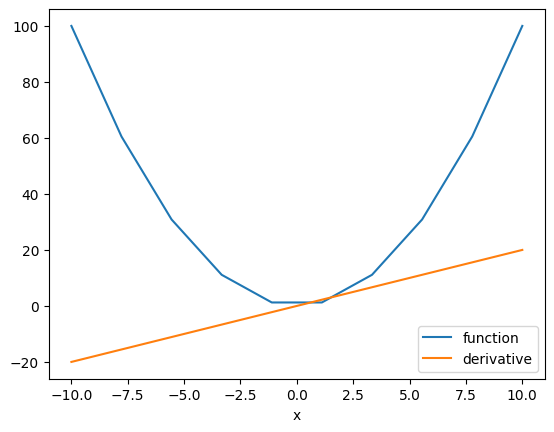

In [18]:
# Calculate the derivative with multiple values
import matplotlib.pyplot as plt

x_lin = torch.linspace(-10, 10, 10, requires_grad = True)
Ym = x_lin ** 2
ym = torch.sum(x_lin ** 2)

ym.backward()  # Autograd derivative only works on scalar value (not on multi dimensional)

plt.plot(x_lin.detach().numpy(), Ym.detach().numpy(), label = 'function')
plt.plot(x_lin.detach().numpy(), x_lin.grad.detach().numpy(), label = 'derivative')
"""
The method detach() excludes further tracking of operations in the graph, and the subgraph
will not record operations. This allows us to then convert the tensor to a numpy array.
"""
plt.xlabel('x')
plt.legend()
plt.show()

In [19]:
# Autograd for Neural Network models:

# Within a subclass of torch.nn.Module, it’s assumed that we want to track gradients on
# the layers’ weights for learning. Therefore, we never specify requires_grad=True for the model’s layers.


# The optimizer is responsible for updating model weights based on the computed gradients.
# optimizer.step()

"""
One important thing about the process: After calling optimizer.step(), you need to
call optimizer.zero_grad(), or else every time you run loss.backward(), the gradients on
the learning weights will accumulate and cause  incorrect and unpredictable learning results.
"""

# If we only need autograd turned off temporarily, a better way is to use the torch.no_grad().
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

@torch.no_grad()
def add_tensors2(x, y):
  return x + y

c1 = a + b
print("c1: ", c1)

with torch.no_grad():
  c2 = a + b

print("c2: ", c2)

print("With decorator: ", add_tensors2(a, b))

c3 = a * b
print("c3: ", c3)

c1:  tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
c2:  tensor([[5., 5., 5.],
        [5., 5., 5.]])
With decorator:  tensor([[5., 5., 5.],
        [5., 5., 5.]])
c3:  tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [20]:
# Autograd Profiler
"""
Autograd tracks every step of your computation in detail. Such a computation history,
combined with timing information, would make a handy profiler - and
autograd has that feature baked in.
"""

device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
  device = torch.device('gpu')
  run_on_gpu = True

x = torch.randn(1, 3, requires_grad=True)
y = torch.rand(1, 3, requires_grad=True)
z = torch.ones(1, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
  for _ in range(1000):
    z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        51.92%      12.772ms        51.92%      12.772ms      12.772us          1000  
    aten::mul        48.08%      11.829ms        48.08%      11.829ms      11.829us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 24.601ms



In [21]:
# Advanced Topic: More Autograd Detail and the High-Level API
"""
Since Autograd we calculated above was only for scalar output function.
"""
# If you have a function with an n-dimensional input and m-dimensional output,
# y = F(x), the complete gradient is a matrix of the derivative of every output
# with respect to every input, called the Jacobian.
"""
Refer here: https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html
"""
x = torch.randn(3, requires_grad=True)

y = x * 2
print(y)
# y.backward() , It won't work here.

# For a multi-dimensional output, autograd expects us to provide gradients for
# those three outputs that it can multiply into the Jacobian
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients

y.backward(v)

print(x.grad)
print("\n")



# Similarily, we can use Jacobian in-built methods for such computations.
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(2), torch.rand(2)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

tensor([-1.9119, -1.0408, -1.5046], grad_fn=<MulBackward0>)
tensor([2.0000e-01, 2.0000e+00, 2.0000e-04])


(tensor([0.1332, 0.0023]), tensor([0.4945, 0.3857]))


(tensor([[2.2849, 0.0000],
         [0.0000, 2.0045]]),
 tensor([[3., 0.],
         [0., 3.]]))

In [22]:
# Similarily, We can provide v vector, along with input while computing gradient using Jacobian
# There is also a function to directly compute the vector-Jacobian product, if you provide the vector
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ 1515.3389, -1006.8062,   241.5969]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))

In [23]:
from logging import raiseExceptions
# Creating custom Dataset Class by extending PyTorch Dataset to generate dataset.
# Also, It can handle the transform of the generated dataset

from torch.utils.data import Dataset  # Dataset class
torch.manual_seed(1)  # setting seed value

class get_Dataset(Dataset):

  def __init__(self, length = 100, transform = None) -> None:
    super().__init__()
    self.x = torch.ones(size=(length, 3))
    self.y = torch.ones(size=(length, 1))
    self.len = length
    self.transform = transform

  def __getitem__(self, index):
    if(index < self.len):
      sample = (self.x[index], self.y[index])
      if self.transform:
        sample = self.transform(sample)
      return sample
    else :
      raise Exception("Index out of bound requested")

  def __len__(self):
    return self.len



In [24]:
#Let's create custom Dataset Object.

custom_dataset = get_Dataset()
print("custom dataset: ", custom_dataset)
print("length :", custom_dataset.len)
print("value at index 2: ", custom_dataset[2])

# Dataset object is also an Iterable.
# get the data of dataset while Iterating over it
for xi, yi in custom_dataset:
  print(f'x : {xi}, y: {yi}')
  break



custom dataset:  <__main__.get_Dataset object at 0x7ed574a97010>
length : 100
value at index 2:  (tensor([1., 1., 1.]), tensor([1.]))
x : tensor([1., 1., 1.]), y: tensor([1.])


In [25]:
# Lets add Transform function while creating dataset.
# Lets create callable transform class

class simple_transform_one(object):

  def __init__(self, x_transform=2, y_transform = 3):
    self.xf = x_transform
    self.yf = y_transform

  def __call__(self, data):
    x = data[0]
    y = data[1]

    x = x*self.xf + 1
    y = y*self.yf
    sample = x, y
    return sample

In [26]:
transform_obj = simple_transform_one(x_transform=0.5) # creating transform callable object
t_custom_dataset = get_Dataset(transform=transform_obj) # passing transform object
print("value at index 2: ", t_custom_dataset[2])
print("directly transforming value at index 2: ", transform_obj(custom_dataset[2]))

value at index 2:  (tensor([1.5000, 1.5000, 1.5000]), tensor([3.]))
directly transforming value at index 2:  (tensor([1.5000, 1.5000, 1.5000]), tensor([3.]))


In [27]:
# Composing multiple transform functions as a pipeline for dataset

# Run the command below when you do not have torchvision installed
#!mamba install -y torchvision

from torchvision import transforms

In [28]:
class simple_transform_two(object):

  def __init__(self, x_transform=2, y_transform = 3):
    self.xf = x_transform
    self.yf = y_transform

  def __call__(self, data):
    x = data[0]
    y = data[1]

    x = x*self.xf + x*2 + 1
    y = y*self.yf + 1
    sample = x, y
    return sample

In [29]:
# Composing the transform functions into a list form and passing it at once
data_transform = transforms.Compose([simple_transform_one(), simple_transform_two()])
print("The combination of transforms (Compose): ", data_transform)

multiTransform_dataset = get_Dataset(transform=data_transform)
print("value at index 2: ", multiTransform_dataset[2])

The combination of transforms (Compose):  Compose(
)
value at index 2:  (tensor([13., 13., 13.]), tensor([10.]))


In [30]:
# Creating Dataset class which will fetch data from local storage
# Let's consider image data (containing images of animals with its class) are
# stored in the local storage in csv format.
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os

"""
SL No. |  class name    |  image name
 1     |  dog           | /dataset/train/image_001
 2     |  cat           | /dataset/train/image_002
 3     |  rat           | /dataset/train/image_003
 4     |  dog           | /dataset/train/image_004

"""
# csv path for stored dataset in local drive
dir = ""
csv_file ='index.csv'  #csv file name
csv_path = os.path.join(dir, csv_file)
data_name = pd.read_csv(csv_path)  # reading data from csv file

# 'File name : data_name.iloc[1, 1]   , [row, column]
# 'class name: data_name.iloc[1, 0]

# thus, image path can be found as:
image_path = os.path.join(dir, data_name.iloc[1, 1])

FileNotFoundError: ignored

In [ ]:
# Custom dataset class to read images one by one without storing all data at once

class Img_Dataset(Dataset):

    def __init__(self, csv_file, data_dir, transform=None):

        # Image directory
        self.data_dir=data_dir

        self.transform = transform

        data_dircsv_file=os.path.join(self.data_dir, csv_file)

        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)

        # Number of images in dataset
        self.len=self.data_name.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):

        # Image file path
        img_name=os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)

        # The class label for the image
        y = self.data_name.iloc[idx, 0]

        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [ ]:
# Create the dataset objects

imgdataset = Img_Dataset(csv_file=csv_file, data_dir=dir)

In [ ]:
# Combine two transforms: crop and convert to tensor.

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=dir, transform=croptensor_data_transform )

In [ ]:
# Loading Pre-Built datasets from PyTorch Library
# All prebuilt dataset are inside the dsets of Pytorch library
# Its similar to TensorFlow tf.data.Dataset
import torchvision.datasets as dsets

# Import the prebuilt dataset into variable dataset
dataset = dsets.MNIST(root = './data',  download = False, transform = transforms.ToTensor())

In [32]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class CustomDeepneuralNetwork(nn.Module):
    def __init__(self):
        super(CustomDeepneuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [33]:
# Training Process for Deep Neural Networks in PyTorch

# Define loss function as per model requires
loss_fn = torch.nn.CrossEntropyLoss()

# Create instance of Neural Network class
model = CustomDeepneuralNetwork()

# Very important:   ******
# If the model needs to run on other device like GPU, modelparameter should be stored
# on the right device before calling Optimizers
model.to(device)

# Chooose any Optimizers specified in the torch.optim package like SGD, Adam, Adagrad
# Optimizers must be callled on the Model parameters.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Randomly initialize for dummy example
training_loader = torch.utils.data.DataLoader(custom_dataset)
validation_loader =  torch.utils.data.DataLoader(custom_dataset)

In [34]:
# Define all training computation steps per epoch in a function

def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.  # initialize loss variables
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # reset your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            # store details in SummaryWriter for TensorBoard display
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [ ]:
# Understand the computation at the end of each Epoch
# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/custom_model_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Very important:   ******
    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0

    # Very important: *******
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Very important: *******
    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log in SummaryWriter the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

In [ ]:
# Saving and Loading PyTorch Model
"""
When it comes to saving and loading models, there are three core functions to be familiar with:

1. torch.save: Saves a serialized object to disk. This function uses Python’s pickle
   utility for serialization. Models, tensors, and dictionaries of all kinds of objects
   can be saved using this function.

2. torch.load: Uses pickle’s unpickling facilities to deserialize pickled object
   files to memory. This function also facilitates the device to load the data.

3. torch.nn.Module.load_state_dict: Loads a model’s parameter dictionary using a
   deserialized state_dict. For more information on state_dict.
   """

# A state_dict is simply a Python dictionary object that maps each layer to its
# parameter tensor. Note that only layers with learnable parameters (convolutional
# layers, linear layers, etc.) and registered buffers (batchnorm’s running_mean)
# have entries in the model’s state_dict. Optimizer objects (torch.optim) also have
# a state_dict, which contains information about the optimizer’s state, as well as
# the hyperparameters used.

In [ ]:
# Saving & Loading Model for Inference
# A common PyTorch convention is to save models using either a .pt or .pth file extension.
PATH = "./output/saved_model.pt"

# Save the model paramters using state_dict()
torch.save(model.state_dict(), PATH)

# Load the model parameters from saved file
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
# Remember that you must call model.eval() to set dropout and batch normalization
# layers to evaluation mode before running inference. Failing to do this will
# yield inconsistent inference results.
model.eval()

In [ ]:
# Save/Load Entire Model
# Saving a model in this way will save the entire module using Python’s pickle module.
torch.save(model, PATH)


# Load the model
model = TheModelClass() # need to define model first
model = torch.load(PATH)
model.eval()

In [ ]:
# Export/Load Model in TorchScript Format
"""
One common way to do inference with a trained model is to use TorchScript, an intermediate
representation of a PyTorch model that can be run in Python as well as in a high performance
environment like C++. TorchScript is actually the recommended model format for
scaled inference and deployment.
"""
# Using the TorchScript format, you will be able to load the exported model and
# run inference without defining the model class.

# save the model
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save


# Load model
model = torch.jit.load('model_scripted.pt')
model.eval()

In [ ]:
# Warmstarting Model Using Parameters from a Different Model in Transfer Learning

# Save the model
torch.save(modelA.state_dict(), PATH)

# Load the model
modelB = TheModelBClass(*args, **kwargs)
modelB.load_state_dict(torch.load(PATH), strict=False)

# Whether you are loading from a partial state_dict, which is missing some keys,
# or loading a state_dict with more keys than the model that you are loading into,
# you can set the strict argument to False in the load_state_dict() function to
# ignore non-matching keys.

In [ ]:
from torch.serialization import MAP_LOCATION
# Saving & Loading Model Across Devices

# save the model
torch.save(model.state_dict(), PATH)

# load the model on CPU
device = torch.device('cpu')
model = TheModelClass(*args, **kwargs)
model = torch.load_state_dict(torch.load(PATH), map_location=device)

# load the model on GPU
device = torch.device('gpu')
model = TheModelClass(*args, **kwargs)
model = torch.load_state_dict(torch.load(PATH), map_location=device)
model.to(device)